A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

In [2]:
# Instalar biblioteca
%pip install ucimlrepo

In [3]:
# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

In [4]:
#Analisis Exloratorio

# Inspección general del dataframe
df.info()

df.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Conteo de valores nulos
print(df.isnull().sum())

# Conteo de valores faltantes encubiertos (como '?')
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {(df[col] == ' ?').sum()}")


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
workclass: 0
education: 0
marital-status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
native-country: 0
income: 0


In [6]:
print("Tamaño original:", df.shape)

# Eliminar filas con valores nulos
df_clean = df.dropna()

# Mostrar nuevo tamaño
print("Tamaño tras limpieza:", df_clean.shape)

# Confirmamos q no hay nulos
df_clean.isnull().sum()

Tamaño original: (48842, 15)
Tamaño tras limpieza: (47621, 15)


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
# Reemplazar '?' por 'Unknown' en occupation
df_clean['occupation'] = df_clean['occupation'].replace(' ?', 'Unknown')

/tmp/ipython-input-7-2116915843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['occupation'] = df_clean['occupation'].replace(' ?', 'Unknown')


In [8]:
df_clean['income'] = df_clean['income'].str.replace('.','', regex = False) #lo ocupamos, dado que se detectó que hay variables mal escritas, como: "50k" y "50k."; lo cual el punto lo hace tomar como dos variables distintas.

/tmp/ipython-input-8-45040091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['income'] = df_clean['income'].str.replace('.','', regex = False) #lo ocupamos, dado que se detectó que hay variables mal escritas, como: "50k" y "50k."; lo cual el punto lo hace tomar como dos variables distintas.


In [9]:
# Eliminar espacios en los strings antes de reemplazar
df_clean['occupation'] = df_clean['occupation'].str.strip()
df_clean['occupation'] = df_clean['occupation'].replace('?', 'Unknown')

/tmp/ipython-input-9-2819184410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['occupation'] = df_clean['occupation'].str.strip()
/tmp/ipython-input-9-2819184410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['occupation'] = df_clean['occupation'].replace('?', 'Unknown')


In [10]:
# Comprobar que se cambió
df_clean['occupation'].value_counts()

,count
occupation,
Prof-specialty,6110
Craft-repair,6089
Exec-managerial,6058
Adm-clerical,5589
Sales,5474
Other-service,4891
Machine-op-inspct,3006
Transport-moving,2341
Handlers-cleaners,2066


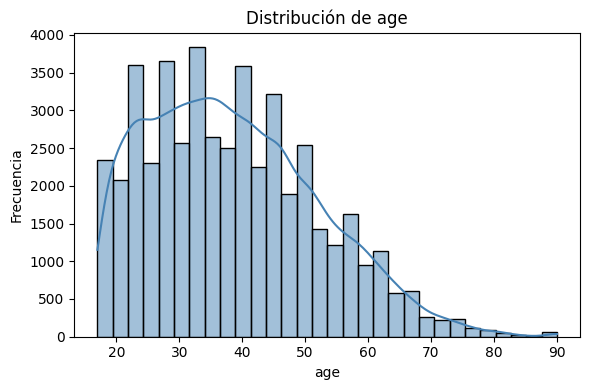

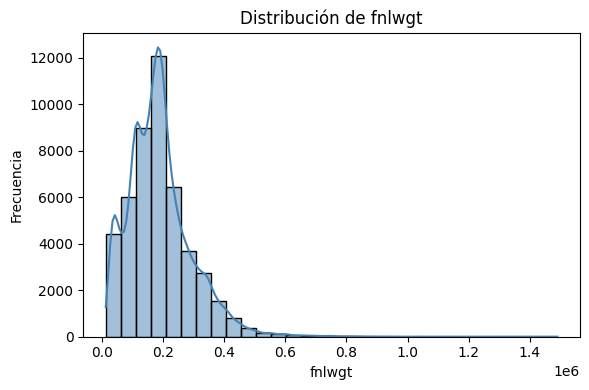

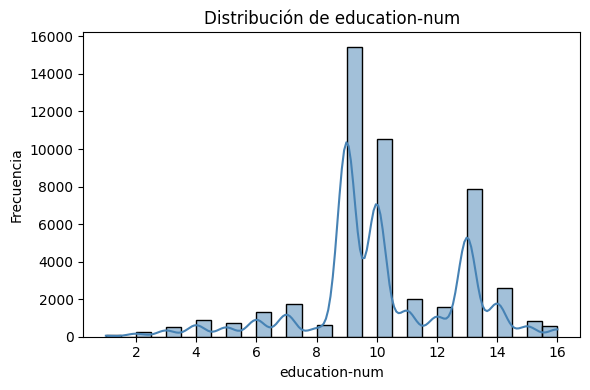

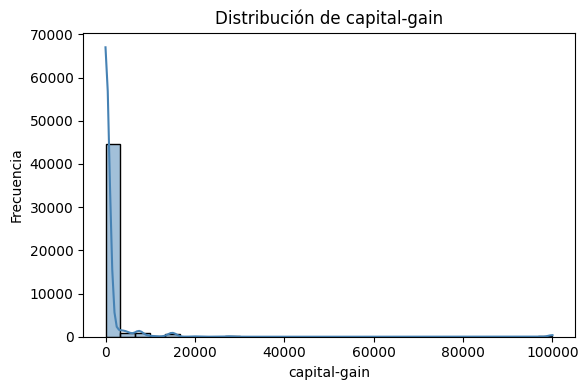

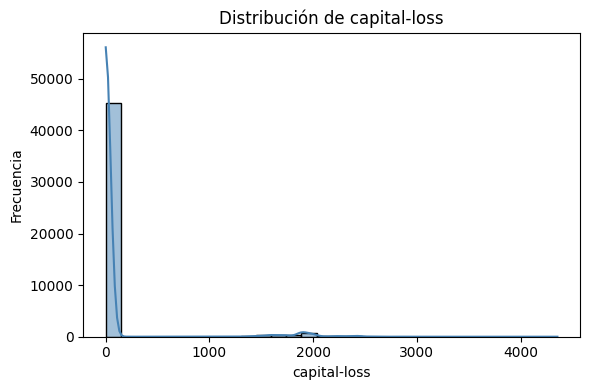

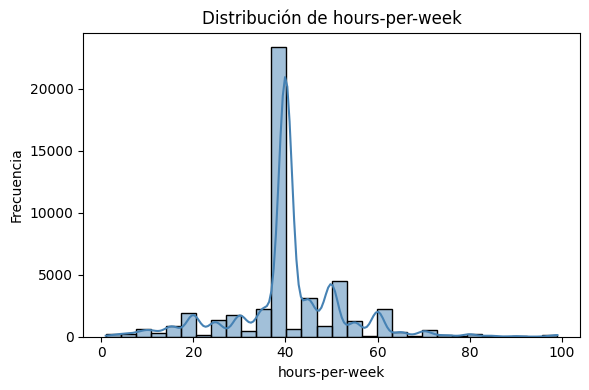

In [11]:
#ANALISIS UNIVARIADO

# Variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

El análisis univariado nos muestra que la mayoría de los individuos tienen entre 25 y 45 años y trabajan aprox 40 horas semanales, reflejando una población laboral activa. Las variables capital-gain y capital-loss están fuertemente concentradas cercanas a valores de 0, lo que indica que pocas personas reportan ganancias o pérdidas de capital. La variable education-num presenta modas claras asociadas a niveles educativos comunes, y fnlwgt muestra una distribución sesgada, sin impacto interpretativo directo, no aparece en la fuente la descripcion de la variable.

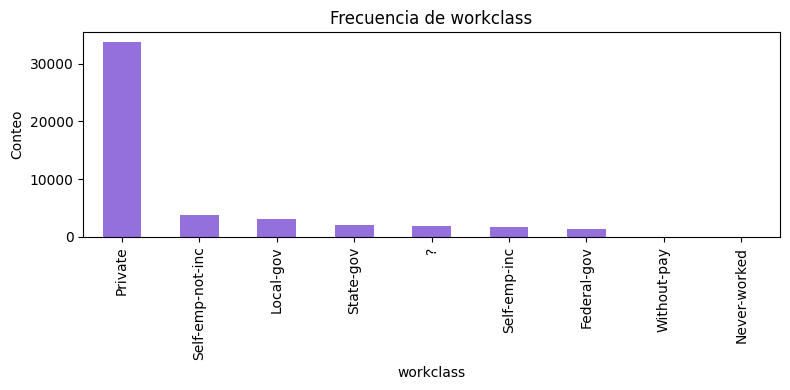

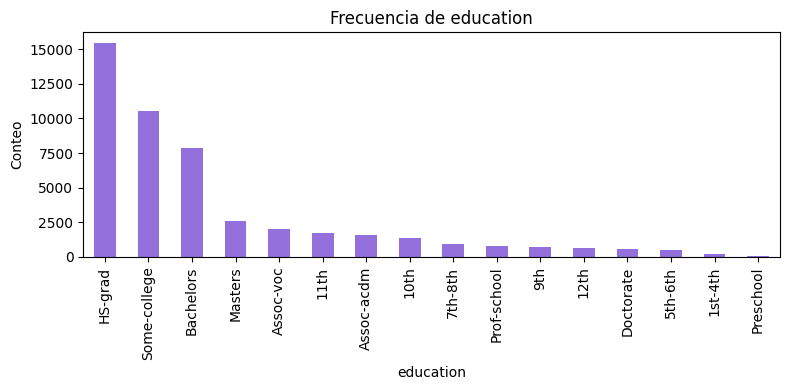

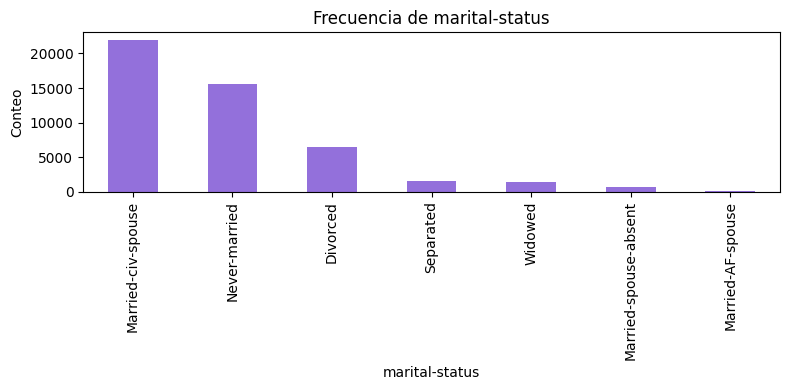

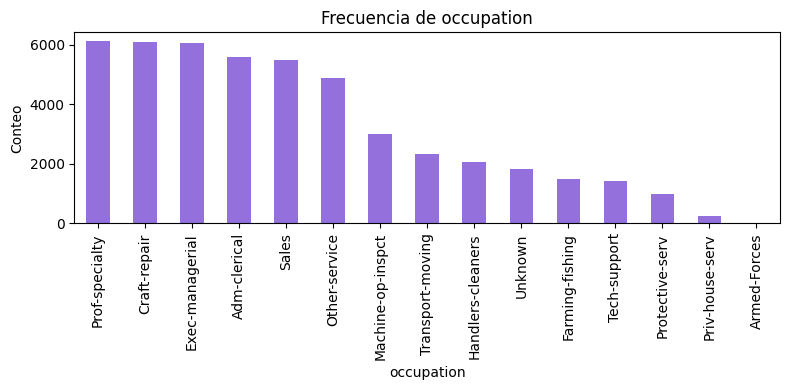

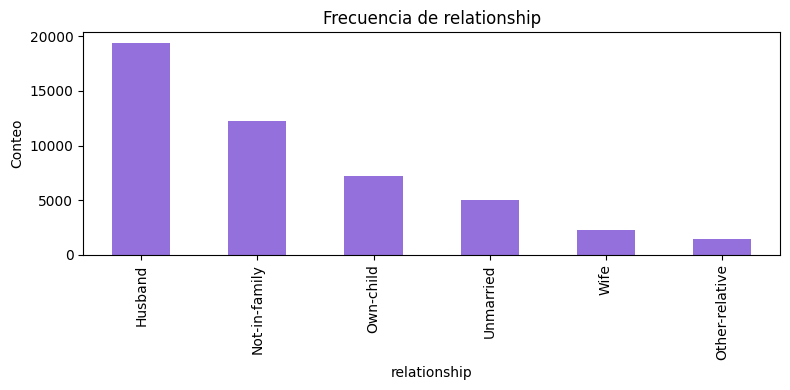

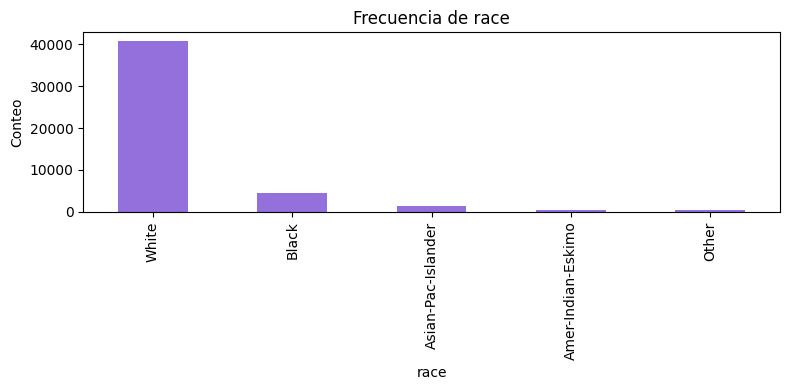

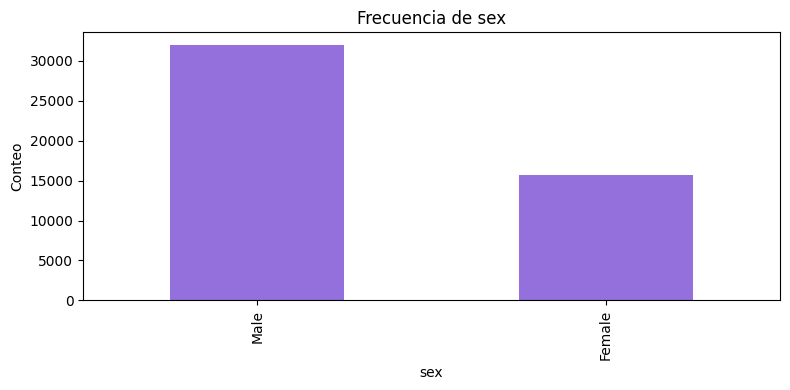

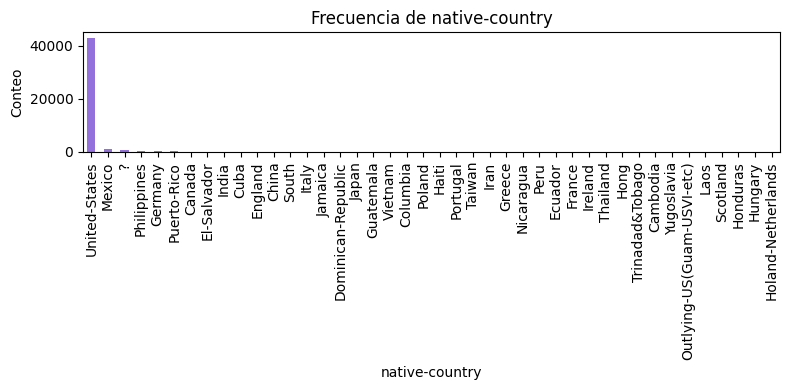

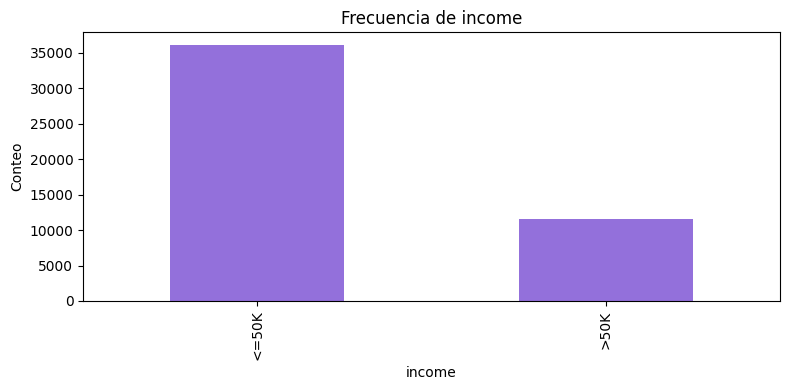

In [12]:
# Variables categóricas
cat_cols = df_clean.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df_clean[col].value_counts().plot(kind='bar', color='mediumpurple')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.tight_layout()
    plt.show()

Se observa que la frecuenciade quienes tienen salarios <= 50k, es mayor a quienes tienen salarios > 50k. Sumado a ello, hay una frecuencia alta de quienes son nativos de Estados Unidos. En cuanto a la frecuencia de la categ´ria sexo, existe una mayor cantidad de varones que de mujeres. Además, se observa que la mayor cantidad de persona estas concentradas quienes se identifican como "raza blanca". Se observa que los niveles educativos están concentrados en quienes solo tienen  el grado "High School".

/tmp/ipython-input-13-1744086584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='income', y='age', palette='Set2')


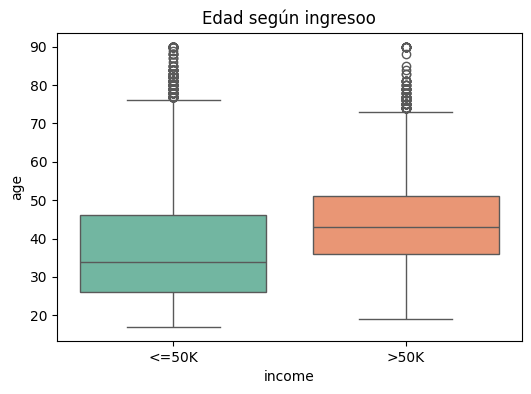

In [13]:
#Analisis Bivariado

# Boxplot: edad según ingreso
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_clean, x='income', y='age', palette='Set2')
plt.title('Edad según ingresoo')
plt.show()

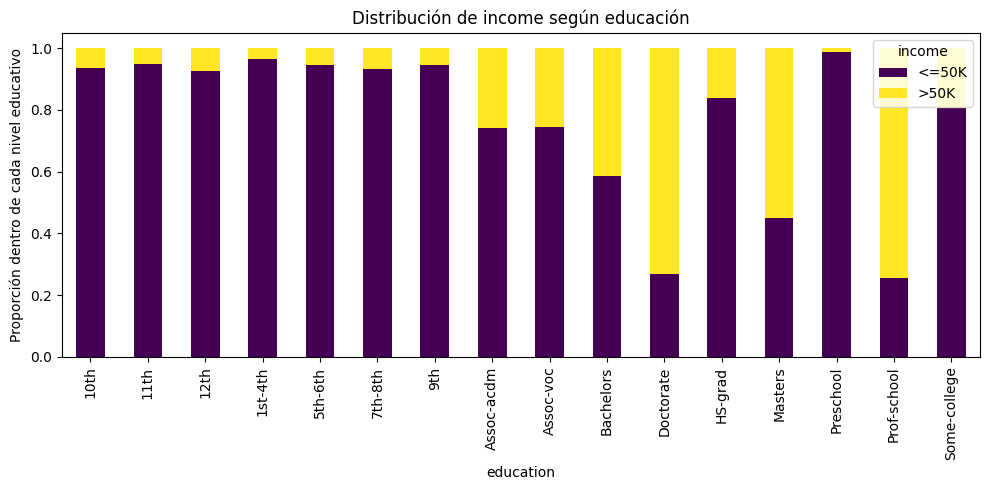

In [14]:
# Barras apiladas: educación vs income
pd.crosstab(df_clean['education'], df_clean['income'], normalize='index') \
  .plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.title('Distribución de income según educación')
plt.ylabel('Proporción dentro de cada nivel educativo')
plt.tight_layout()
plt.show()

En el análisis bivariados se muestran una clara asociación entre variables sociodemográficas y nivel de ingresos. Se observa que a mayor nivel educativo, mayor proporción de individuos con ingresos superiores a 50K, destacando especialmente los niveles de Doctorate, Masters y Prof-school. Por otro lado, el graf boxplot revela que los individuos con mayores ingresos tienden a ser mayores en edad, con una mediana cercana a los 45 años, mientras que los de menores ingresos tienen una mediana inferior a los 35 años, lo cual resulta evidente. Con esto, se concluye que tanto la educación como la experiencia edad son factores relevantes en la determinación del ingreso.

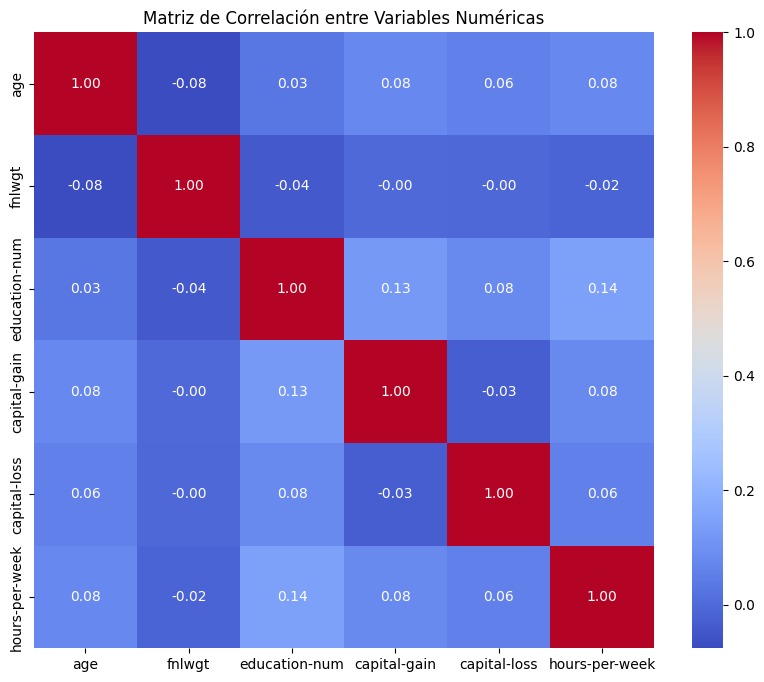

In [15]:
# Seleccionar solo columnas numéricas
num_cols = df_clean.select_dtypes(include=['int64', 'float64'])

# Matriz de correlación
correlation_matrix = num_cols.corr()

# Visualizar matriz como heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

El análisis de correlación revela que las variables numéricas presentan relaciones débiles entre elas, lo que indica baja colinealidad. La mayor asociación positiva se observa entre education-num y hours-per-week 0.14, sugiriendo que mayor nivel educativo podría estar relacionado con jornadas laborales más extensas (basta con ver a los profesores de la facultad, como quienes estan haciendo el doctorado). Education-num muestra una leve correlación con capital-gain, lo que apunta a un posible vínculo entre educación y generación de ingresos de capital.

PARTE_2

In [16]:
#instalamos la librería
!pip install lazypredict

In [17]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
df_sample = df_clean.sample(frac=0.1, random_state=42)

#Separar X e y
X = df_sample.drop('income', axis=1)
y = df_sample['income']


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded = X.apply(lambda col: le.fit_transform(col) if col.dtypes == 'object' else col)
y_encoded = le.fit_transform(y)

# Separar train/test 80% - 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

#  Ejecutar LazyPredict
!pip install lazypredict --quiet

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

#  resultados
import pandas as pd
pd.set_option('display.max_rows', None)
models.head(20)  # 20 mejores modelos

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 945, number of negative: 2864
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 3809, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248097 -> initscore=-1.108790
[LightGBM] [Info] Start training from score -1.108790


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.85,0.78,0.78,0.85,0.17
NearestCentroid,0.73,0.77,0.77,0.75,0.02
RandomForestClassifier,0.85,0.77,0.77,0.85,1.04
LGBMClassifier,0.84,0.76,0.76,0.84,0.18
ExtraTreesClassifier,0.83,0.75,0.75,0.83,0.84
AdaBoostClassifier,0.84,0.74,0.74,0.83,0.35
SVC,0.84,0.73,0.73,0.83,0.88
DecisionTreeClassifier,0.80,0.73,0.73,0.80,0.05
BaggingClassifier,0.82,0.73,0.73,0.82,0.31


Del análisis con LazyPredict, se concluye que los modelos con mejor desempeño para predecir si una persona gana más de 50.000 USD anuales fueron XGBoostClassifier y RandomForestClassifier, ambos alcanzando una precisión de 0.85 y un F1 Score igualmente alto. Estos algoritmos demostraron robustos y eficientes. En contraste, modelos como PassiveAggressiveClassifier o LinearSVC presentaron desempeños significativamente menores, por lo que no se recomiendan para esta tarea en particular. Esta exploración inicial permite enfocar los esfuerzos futuros en los modelos más prometedores.

Lazypredict es útil como punto de partida para comparar rápidamente varios modelos de clasificación sin necesidad de ajustar parametros. Nos permite identificar de forma rapidaalgoritmos tienen mejor desempeño inicial. Sin embargo, su principal limitación es la falta de personalización y optimización, por lo que debe usarse solo como una primera aproximación antes de realizar análisis más detallados por modelos.